In [31]:
!pip install pandas
!pip install numpy
!pip install sklearn
!pip install tensorFlow
!pip install Pillow
!pip install matplotlib
!pip install seaborn

In [32]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [33]:
import matplotlib.pyplot as plt
import PIL
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

print(f'tensorflow version: {tf.__version__}')

tensorflow version: 2.12.0


In [34]:
datasetPath = 'bart_homer/dataset_personagens/dataset_personagens'

train_dir = os.path.join(datasetPath, 'training_set')
validation_dir = os.path.join(datasetPath, 'test_set')

In [35]:
train_bart_dir = os.path.join(train_dir, 'bart')
train_homer_dir = os.path.join(train_dir, 'homer')
validation_bart_dir = os.path.join(validation_dir, 'bart')
validation_homer_dir = os.path.join(validation_dir, 'homer')

In [36]:
qntdBartTreinamento = len(os.listdir(train_bart_dir))
qntdHomerTreinamento = len(os.listdir(train_homer_dir))

qntdBartTeste = len(os.listdir(validation_bart_dir))
qntdHomerTeste = len(os.listdir(validation_homer_dir))

qntdTreinos = qntdBartTreinamento+qntdHomerTreinamento
qntdTeste = qntdBartTeste+qntdHomerTeste

print("Quantidade de Barts de Treinamento: ", qntdBartTreinamento)
print("Quantidade de Homers de Treinamento: ", qntdHomerTreinamento)
print("")
print("Quantidade de Barts de Teste: ", qntdBartTeste)
print("Quantidade de Homers de Teste: ", qntdHomerTeste)
print("");
print("Quantidade de imagens de treinamento: ", qntdTreinos)
print("Quantidade de imagens de teste: ", qntdTeste)

Quantidade de Barts de Treinamento:  118
Quantidade de Homers de Treinamento:  78

Quantidade de Barts de Teste:  42
Quantidade de Homers de Teste:  31

Quantidade de imagens de treinamento:  196
Quantidade de imagens de teste:  73


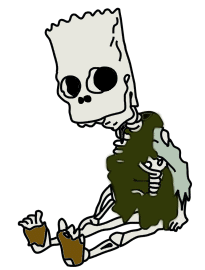

In [37]:
imgBart = os.path.join(train_bart_dir, os.listdir(train_bart_dir)[26])
PIL.Image.open(imgBart)

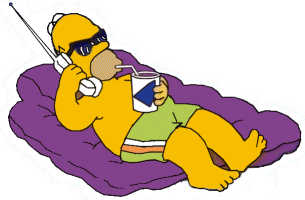

In [38]:
img_homer = os.path.join(train_homer_dir, os.listdir(train_homer_dir)[26])
PIL.Image.open(img_homer)

In [39]:
BATCH_SIZE = 32
IMG_SIZE = (160, 160)

# dados treino com aumento do conjunto de imagems
train_image_gen = ImageDataGenerator(rescale = 1./255,
                               rotation_range = 7,
                               horizontal_flip = True,
                               shear_range = 0.2,
                               height_shift_range = 0.05,
                               zoom_range = 0.2)

val_image_gen = ImageDataGenerator(rescale = 1./255)

train_data_gen = train_image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=IMG_SIZE,
                                                     class_mode='binary')

val_data_gen = val_image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=validation_dir,
                                                 shuffle=True,
                                                 target_size=IMG_SIZE,
                                                 class_mode='binary')

Found 196 images belonging to 2 classes.
Found 73 images belonging to 2 classes.


In [40]:
sample_training_images, _ = next(val_data_gen)

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

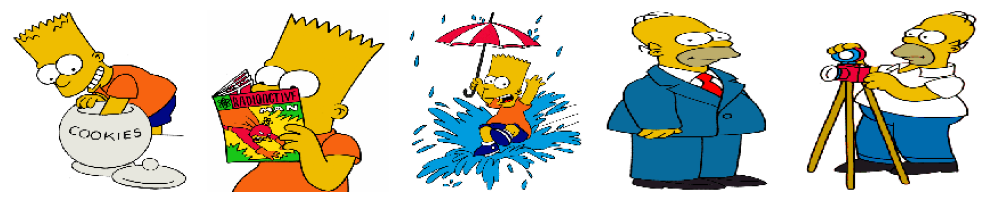

In [41]:
plotImages(sample_training_images[:26])

In [42]:
model = keras.Sequential([
    layers.Conv2D(16, 3, padding='same', activation='elu', input_shape=(160, 160 ,3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='elu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='elu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(512, activation='elu'),
    layers.Dropout(0.2),
    layers.Dense(512, activation='elu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=keras.optimizers.Adam(1e-3),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 160, 160, 16)      448       
                                                                 
 batch_normalization_1 (Batc  (None, 160, 160, 16)     64        
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 80, 80, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 80, 80, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 40, 40, 32)       0         
 2D)                                                             
                                                      

In [43]:
# Mostra o progresso do treinamento imprimindo um único ponto para cada epoch completada
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.>>', end='')

steps_per_epoch = train_data_gen.samples // train_data_gen.batch_size
validation_steps = val_data_gen.samples // val_data_gen.batch_size
epochs=100
    
history = model.fit(
    train_data_gen,
    epochs=epochs, 
    steps_per_epoch=steps_per_epoch,
    validation_data=val_data_gen,
    validation_steps=validation_steps,
    callbacks=[PrintDot()],
    verbose=0
    )


.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>

In [44]:
# Dataframe results model
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.describe()

,loss,accuracy,val_loss,val_accuracy,epoch
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.290721,0.926282,0.516605,0.819219,49.500000
std,1.069243,0.093656,0.276786,0.114739,29.011492
min,0.000405,0.481707,0.190460,0.453125,0.000000
25%,0.021559,0.890244,0.360451,0.796875,24.750000
50%,0.103285,0.960366,0.429860,0.859375,49.500000
75%,0.294120,0.993902,0.555568,0.890625,74.250000
max,10.675893,1.000000,1.886322,0.953125,99.000000


In [53]:
eval_results = model.evaluate(val_data_gen)
print('Acurácia: {:2.2%}'.format(eval_results[1]))

3/3 [==============================] - 1s 139ms/step - loss: 0.4556 - accuracy: 0.8904
Acurácia: 89.04%


In [62]:
test_bart = os.path.join(train_bart_dir, os.listdir(train_bart_dir)[5])
homer_test = os.path.join(train_homer_dir, os.listdir(train_homer_dir)[13])
inv_map = {train_data_gen.class_indices[k] : k for k in train_data_gen.class_indices}
inv_map

{0: 'bart', 1: 'homer'}

In [64]:
imagem_teste = image.load_img(homer_test, target_size = (160,160))
imagem_teste = image.img_to_array(imagem_teste)
imagem_teste /= 255
imagem_teste = np.expand_dims(imagem_teste, axis = 0)

previsao = model.predict(imagem_teste).flatten()
prev_name = tf.where(previsao < 0.5, 0, 1).numpy()

inv_map[prev_name[0]], previsao

AttributeError: module 'keras.preprocessing.image' has no attribute 'load_img'

1/1 [==============================] - 0s 410ms/step


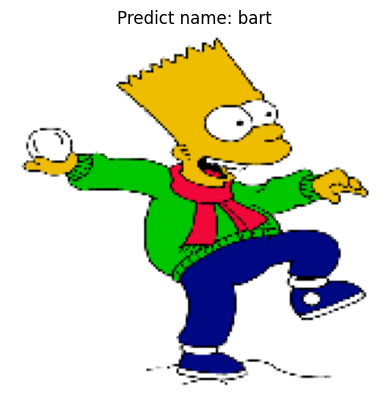

In [50]:
img1, nome = next(val_data_gen)
pred = model.predict(img1).flatten()
pred = tf.where(pred < 0.5, 0, 1)
plt.imshow(img1[0])
title = inv_map[pred.numpy()[0]]
plt.title(f'Predict name: {title}')
plt.axis("off")
plt.show()